In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd

In [12]:
torch.cuda.is_available()

True

In [13]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
%cd /content/drive/MyDrive/Course Material/Supervised Machine Learning/Neural Networks for Classification

/content/drive/MyDrive/Course Material/Supervised Machine Learning/Neural Networks for Classification


In [16]:
data = pd.read_csv('Heterogeneous_accelerometer_HAR.csv')
data.shape

(3540962, 10)

In [17]:
data.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696638740,27920678471000,-0.565032,-9.572019,-0.614113,a,gear,gear_1,stand
1,1,1424696638740,27920681910000,-0.832584,-9.713276,-0.606930,a,gear,gear_1,stand
2,2,1424696638740,27920692014000,-1.018134,-9.935339,-0.544082,a,gear,gear_1,stand
3,3,1424696638741,27920701983000,-1.222838,-10.142437,-0.566229,a,gear,gear_1,stand
4,4,1424696638741,27920711906000,-1.577180,-10.480618,-0.402824,a,gear,gear_1,stand


In [18]:
data.isnull().any()

Index            False
Arrival_Time     False
Creation_Time    False
x                False
y                False
z                False
User             False
Model            False
Device           False
gt                True
dtype: bool

In [19]:
data.dropna(inplace = True)

In [20]:
data.isnull().any()

Index            False
Arrival_Time     False
Creation_Time    False
x                False
y                False
z                False
User             False
Model            False
Device           False
gt               False
dtype: bool

In [21]:
har = data[['x','y','z','gt']]

In [22]:
har.head()

,x,y,z,gt
0,-0.565032,-9.572019,-0.614113,stand
1,-0.832584,-9.713276,-0.606930,stand
2,-1.018134,-9.935339,-0.544082,stand
3,-1.222838,-10.142437,-0.566229,stand
4,-1.577180,-10.480618,-0.402824,stand


In [23]:
har['gt'].unique()

array(['stand', 'sit', 'walk', 'stairsup', 'stairsdown', 'bike'],
      dtype=object)

In [24]:
stand = har[har['gt'] == 'stand']

In [25]:
stand.head()

,x,y,z,gt
0,-0.565032,-9.572019,-0.614113,stand
1,-0.832584,-9.713276,-0.606930,stand
2,-1.018134,-9.935339,-0.544082,stand
3,-1.222838,-10.142437,-0.566229,stand
4,-1.577180,-10.480618,-0.402824,stand


In [26]:
stand = stand.iloc[0:5000,:]

In [27]:
stand.shape

(5000, 4)

In [ ]:
type(stand)

In [28]:
sit = har[har['gt'] == 'sit'].iloc[0:5000,:]

In [ ]:
sit.head()

In [ ]:
sit.shape

In [29]:
walk = har[har['gt'] == 'walk'].iloc[0:5000,:]

In [30]:
stairsup = har[har['gt'] == 'stairsup'].iloc[0:5000,:]

In [31]:
stairsdown = har[har['gt'] == 'stairsdown'].iloc[0:5000,:]

In [32]:
bike = har[har['gt'] == 'bike'].iloc[0:5000,:]

In [33]:
harnew = pd.concat([stand, sit, walk, stairsup, stairsdown, bike])

In [34]:
harnew.shape

(30000, 4)

In [35]:
harnew

,x,y,z,gt
0,-0.565032,-9.572019,-0.614113,stand
1,-0.832584,-9.713276,-0.606930,stand
2,-1.018134,-9.935339,-0.544082,stand
3,-1.222838,-10.142437,-0.566229,stand
4,-1.577180,-10.480618,-0.402824,stand
...,...,...,...,...
32228,-7.964911,-0.887650,6.034586,bike
32229,-8.882488,-1.451485,6.030994,bike
32230,-8.641871,-1.823783,6.533178,bike
32231,-9.081207,-1.670554,7.043143,bike


In [36]:
harnew['gt'].replace(to_replace = 'stand', value = 0, inplace = True)
harnew['gt'].replace(to_replace = 'sit', value = 1, inplace = True)
harnew['gt'].replace(to_replace = 'walk', value = 2, inplace = True)
harnew['gt'].replace(to_replace = 'stairsup', value = 3, inplace = True)
harnew['gt'].replace(to_replace = 'stairsdown', value = 4, inplace = True)
harnew['gt'].replace(to_replace = 'bike', value = 5, inplace = True)

In [37]:
harnew

,x,y,z,gt
0,-0.565032,-9.572019,-0.614113,0
1,-0.832584,-9.713276,-0.606930,0
2,-1.018134,-9.935339,-0.544082,0
3,-1.222838,-10.142437,-0.566229,0
4,-1.577180,-10.480618,-0.402824,0
...,...,...,...,...
32228,-7.964911,-0.887650,6.034586,5
32229,-8.882488,-1.451485,6.030994,5
32230,-8.641871,-1.823783,6.533178,5
32231,-9.081207,-1.670554,7.043143,5


In [38]:
harnew.isnull().any()

x     False
y     False
z     False
gt    False
dtype: bool

# Feature Engineering

## ( See Project_06 : Feature Engineering by Window Method, Section : Data Preprocessing )

In [42]:
X_Min=[]
X_Max=[]
X_Mean=[]
X_Std=[]

Y_Min=[]
Y_Max=[]
Y_Mean=[]
Y_Std=[]

Z_Min=[]
Z_Max=[]
Z_Mean=[]
Z_Std=[]

labels=[]

win = 256

X = harnew['x'].values
Y = harnew['y'].values
Z = harnew['z'].values

label = harnew['gt'].values

for i in range(len(X) - 256):

    X_i = X[i:i+win]
    Y_i = Y[i:i+win]
    Z_i = Z[i:i+win]
    y = label[i+win]
    labels.append(y)

    X_Min.append(np.min(X_i))
    X_Max.append(np.max(X_i))
    X_Mean.append(np.mean(X_i))
    X_Std.append(np.std(X_i))

    Y_Min.append(np.min(Y_i))
    Y_Max.append(np.max(Y_i))
    Y_Mean.append(np.mean(Y_i))
    Y_Std.append(np.std(Y_i))

    Z_Min.append(np.min(Z_i))
    Z_Max.append(np.max(Z_i))
    Z_Mean.append(np.mean(Z_i))
    Z_Std.append(np.std(Z_i))

In [43]:
NewData = pd.DataFrame({'X_Min': X_Min, 'X_Max': X_Max, 'X_Mean': X_Mean, 'X_Std': X_Std,
                        'Y_Min': Y_Min, 'Y_Max': Y_Max, 'Y_Mean': Y_Mean, 'Y_Std': Y_Std,
                        'Z_Min': Z_Min, 'Z_Max': Z_Max, 'Z_Mean': Z_Mean, 'Z_Std': Z_Std,
                        'labels':labels})

In [44]:
NewData

,X_Min,X_Max,X_Mean,X_Std,Y_Min,Y_Max,Y_Mean,Y_Std,Z_Min,Z_Max,Z_Mean,Z_Std,labels
0,-12.600683,-0.565032,-8.930767,1.345873,-11.082760,-3.336919,-3.954286,1.272895,-1.379060,1.015740,-1.006481,0.298180,0
1,-12.600683,-0.832584,-8.963975,1.239743,-11.082760,-3.336919,-3.932986,1.223371,-1.379060,1.015740,-1.008789,0.297420,0
2,-12.600683,-1.018134,-8.996428,1.130377,-11.082760,-3.336919,-3.910559,1.168600,-1.379060,1.015740,-1.011457,0.296866,0
3,-12.600683,-1.222838,-9.028315,1.014014,-11.082760,-3.336919,-3.886816,1.106022,-1.379060,1.015740,-1.014370,0.295923,0
4,-12.600683,-1.577180,-9.059589,0.888489,-11.082760,-3.336919,-3.861887,1.034341,-1.379060,1.015740,-1.017286,0.295169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29739,-11.146805,-4.592678,-7.576585,1.146897,-3.280655,1.973421,-0.822640,0.926178,3.188478,8.395866,5.920372,0.951775,5
29740,-11.146805,-4.592678,-7.576867,1.146983,-3.280655,1.973421,-0.824971,0.925588,3.188478,8.395866,5.916360,0.949116,5
29741,-11.146805,-4.592678,-7.584871,1.148916,-3.280655,1.973421,-0.828515,0.926243,3.188478,8.395866,5.912890,0.947065,5
29742,-11.146805,-4.592678,-7.593325,1.148700,-3.280655,1.973421,-0.834323,0.927802,3.188478,8.395866,5.910702,0.944980,5


In [45]:
data = NewData[NewData.columns[0:-1]].values

In [46]:
data.shape

(29744, 12)

In [47]:
targets = NewData[NewData.columns[-1]].values

In [48]:
targets.shape

(29744,)

In [49]:
NewData['labels'].value_counts()

1    5000
2    5000
3    5000
4    5000
5    5000
0    4744
Name: labels, dtype: int64

In [50]:
n_classes = len(NewData.iloc[:,-1].unique())
n_classes

6

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size = 0.2)

# Transform to Tensor and Using DataLoader

In [52]:
# Convert to tensor
train_data = torch.tensor(X_train).float()
train_labels = torch.tensor(y_train).long()
test_data = torch.tensor(X_test).float()
test_labels = torch.tensor(y_test).long()


# Convert to PyTorch Datasets
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

# Place into dataloader
batchsize    = 64
train_loader = DataLoader(train_data, batch_size = batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data, batch_size = test_data.tensors[0].shape[0])

# Observe the batches of training and test data

In [53]:
for X,y in train_loader:
    break
print(X.shape)
print(y.shape)

torch.Size([64, 12])
torch.Size([64])


In [ ]:
print(y)

In [54]:
for X,y in test_loader:
    break
print(X.shape)
print(y.shape)

torch.Size([5949, 12])
torch.Size([5949])


In [ ]:
X,y = next(iter(test_loader))
print(X.shape)
print(y.shape)

# Creating the Neural Network Model

In [55]:
model = nn.Sequential(
          nn.Linear(12,64),
          nn.ReLU(),
          nn.Linear(64,32),
          nn.ReLU(),
          nn.Linear(32,16),
          nn.ReLU(),
          nn.Linear(16,6),
          )
model

Sequential(
  (0): Linear(in_features=12, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=6, bias=True)
)

# Training and Testing the model

In [56]:
epochs = 101
lossfun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),momentum = 0.9, lr=.001)

model.to(device)

losses    = torch.zeros(epochs)
trainAcc  = []
testAcc   = []


for epoch in range(epochs):
 model.train()
 batchAcc  = []
 batchLoss = []
 for X,y in train_loader:

  X = X.to(device)
  y = y.to(device)


  ypred = model(X)
  loss = lossfun(ypred,y)


  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  batchLoss.append(loss.item())


  ypred = ypred.cpu()
  y = y.cpu()


  acc = 100 * torch.mean((torch.argmax(ypred, dim=1) == y).float())
  batchAcc.append(acc)

 trainAcc.append( np.mean(batchAcc) )

 losses[epoch] = np.mean(batchLoss)

# TESTING

 model.eval()
 X,y = next(iter(test_loader))

 X = X.to(device)
 y = y.to(device)

 with torch.no_grad():
  ypred = model(X)

  ypred = ypred.cpu()
  y = y.cpu()

  testAcc.append( 100*torch.mean((torch.argmax(ypred,dim=1)==y).float()) )
  if (epoch % 10) == 0:

        print(f' epochs : {epoch}  loss : {loss : 2.2f}')



 epochs : 0  loss :  0.42
 epochs : 10  loss :  0.02
 epochs : 20  loss :  0.02
 epochs : 30  loss :  0.01
 epochs : 40  loss :  0.01
 epochs : 50  loss :  0.00
 epochs : 60  loss :  0.00
 epochs : 70  loss :  0.00
 epochs : 80  loss :  0.00
 epochs : 90  loss :  0.00
 epochs : 100  loss :  0.00


# Plotting and Visualizing the Results

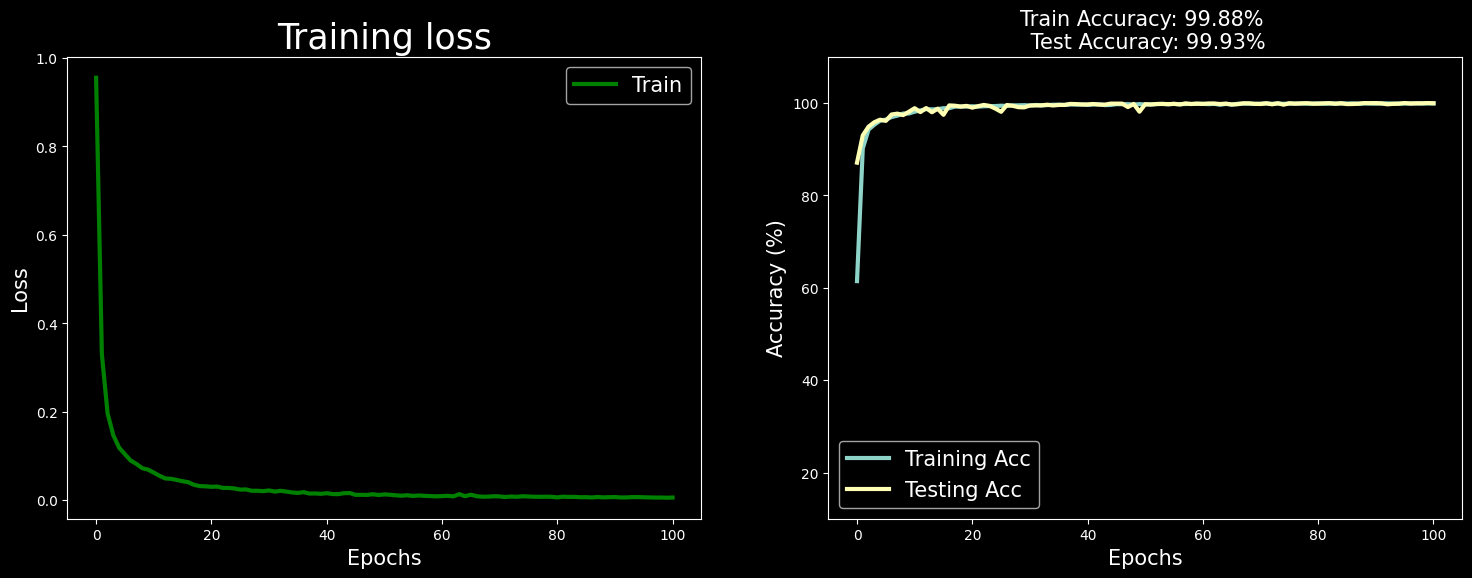

In [57]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(losses,'g', lw = 3)
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(['Train','Test'], fontsize = 15)
ax[0].set_title('Training loss', fontsize = 25)

ax[1].plot(trainAcc,label='Training Acc', lw =3)
ax[1].plot(testAcc,label='Testing Acc', lw = 3)
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim([10,110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()